<h1><center>American University of Armenia</center></h1>
<h2><center>Machine Learning</center></h2>
<h3><center>Instructor: Khoren Petrosyan</center></h3>
<h3><center>Student: Artur Avagyan</center></h3>
<h3><center>Hyperparameter Tuning with UCB </center></h3>

<a class="anchor"></a>
## **Table of Contents**

1. [Data Visualizations](#1)
2. [Data Preprocessing](#2)
3. [UCB and Gradient Boosting](#3)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [16]:
from plots import *
from ucb_gb import *

import numpy as np
import pandas as pd

## **1. Data Visualizations** <a class="anchor" id="1"></a>

In [3]:
titanic = read_data()

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


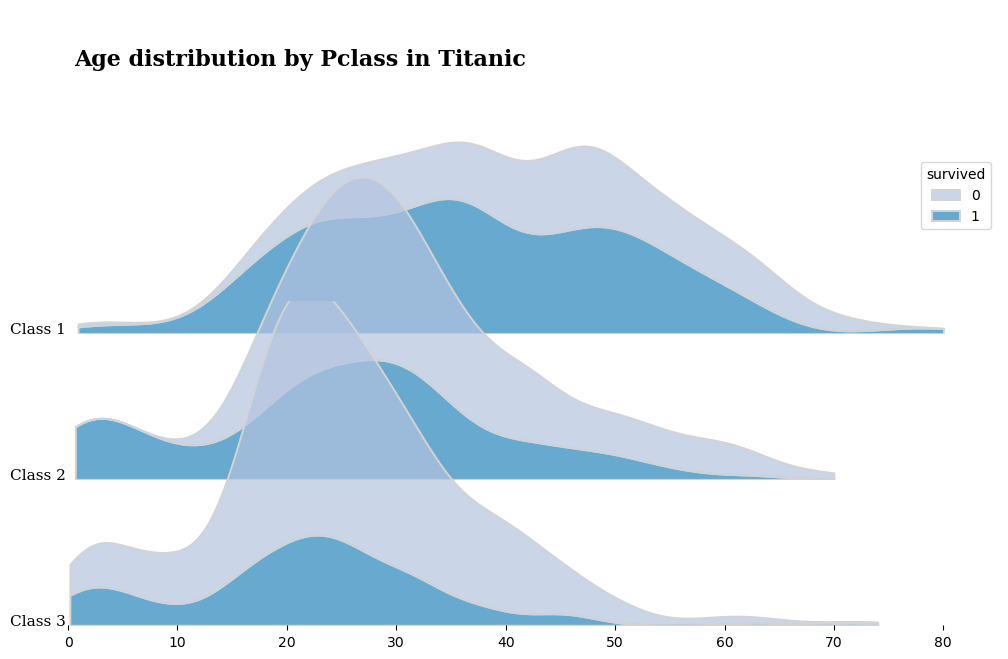

In [5]:
ridgeplot(titanic)

#### From the plot above we can observe that during evacuation, is was given a priority to the first class rather than the other ones, so the first class has the highest survival rate. 

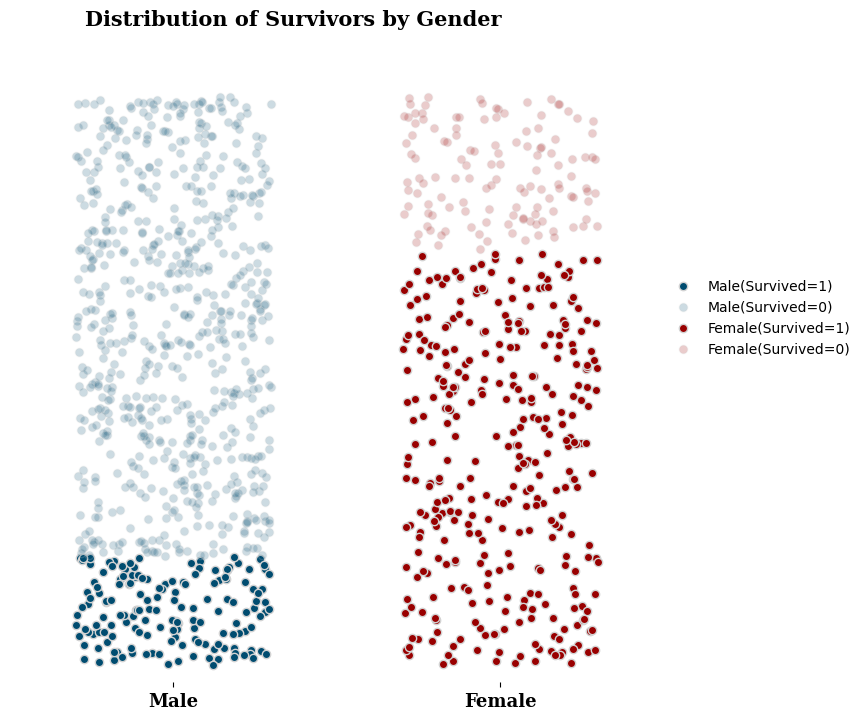

In [6]:
scatterplot(titanic)

#### From the above graph we can infer that the count of female passengers who survived is far higher than the male passengers who survived. So, we can say Females were given priority while evacuation.

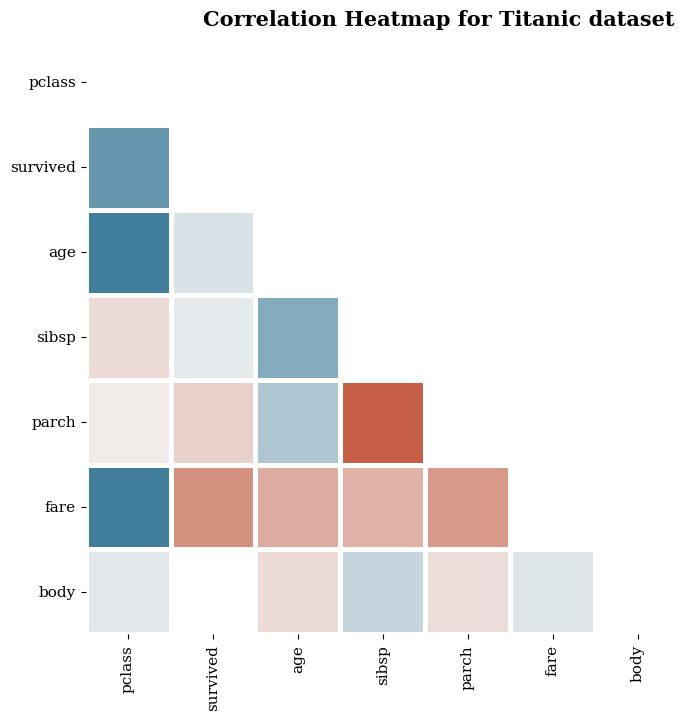

In [7]:
corrmap(titanic)

#### In the plot above we can observe the correlations between features. Correlation goes from dark blue to dark red, meaning highly uncorrelated and highly correlated respectively. We can observe that having parent/child is highly correlated with having sibling/spouse.

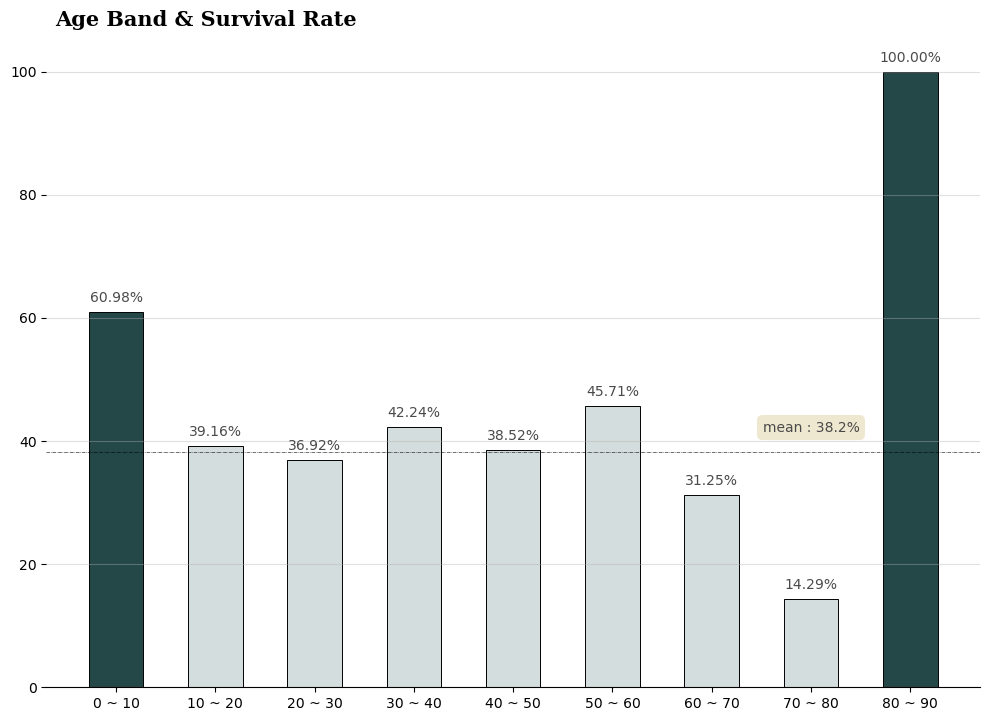

In [8]:
barplot(titanic)

#### From the plot above it can be observed that the survival rates of children and the elderly are the highest, as they have been evacuated first.

## **2. Data Preprocessing** <a class="anchor" id="2"></a>

In [9]:
titanic_cp = titanic.drop(["name", "ticket", "cabin", "boat", "body", "home.dest", "age_band"], axis=1)
titanic_cp["age"].fillna(titanic_cp["age"].mean(), inplace=True)
titanic_cp["embarked"].fillna(titanic_cp["embarked"].mode()[0], inplace=True)
titanic_cp["fare"] = titanic_cp["fare"].fillna(np.mean(titanic_cp["fare"]))
    
titanic_cp = pd.get_dummies(titanic_cp, columns=["sex", "embarked"])

X = titanic_cp.drop("survived", axis=1).values
y = titanic_cp["survived"].values

In [10]:
titanic_cp.isnull().sum()

pclass        0
survived      0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64

## **3. UCB and Gradient Boosting** <a class="anchor" id="3"></a>

In [11]:
learning_rate_space = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
n_estimators_space = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [12]:
num_hyperparameters = len(learning_rate_space) * len(n_estimators_space)
hyperparameter_counts = np.zeros(num_hyperparameters)
hyperparameter_rewards = np.zeros(num_hyperparameters)

In [14]:
GB_classifier_valerr(X, y, learning_rate_space, n_estimators_space, hyperparameter_counts, hyperparameter_rewards, num_hyperparameters)

Best validation error (UCB): 0.04507257448433921 with learning rate 0.4 and number of estimators 300
Best validation error (Random strategy): 0.11917494270435447 with learning rate 0.3 and number of estimators 50


In [15]:
best_hyperparams(X, y, hyperparameter_rewards, learning_rate_space, n_estimators_space)

Best hyperparameters:
Learning Rate: 0.3
Number of Estimators: 50
Accuracy with best hyperparameters: 0.8808250572956455
